# Project - Avocado Price Predict

# Project Description

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Problem Statement

- Explore the insights of Conventional and Organic avocados
- Find the seasonality effect on the prices
- Predict the next year price for both the types of avocado(Conventional and Organic)
- Predict the next year price for LasVegas region for both the types of avocado.

# Dataset Details

- Dataset Characteristics - Timeseries
- Number of Attributes : 13

# Attribute Information

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- type - conventional or organic
- year - the year
- region - the city or region of the observation



# 1. Import Libraries

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sns

Importing plotly failed. Interactive plots will not work.


# 2. Import Data

In [2]:
avocado_data = pd.read_csv('avocado.csv')
avocado_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### Removing irreleavent columns

In [3]:
avocado_data.drop(columns=['Unnamed: 0', '4046','4225','4770','Large Bags','Total Bags','Small Bags', 'XLarge Bags'], inplace=True)
avocado_data

,Date,AveragePrice,Total Volume,type,year,region
0,2015-12-27,1.33,64236.62,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,conventional,2015,Albany
...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,organic,2018,WestTexNewMexico


# 3. Exploring the Data

In [4]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 6 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 855.5+ KB


### Converting Date column into datetime data type

In [5]:
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'], format="%Y-%m-%d")
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 6 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 855.5+ KB


### To see records per avocado type

In [6]:
avocado_data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

#### Records for both the types are almost same so the comparion between them would be appropriate

## Divide the data based on the types

In [7]:
conventional_df = avocado_data[avocado_data['type']=='conventional']
conventional_df

,Date,AveragePrice,Total Volume,type,year,region
0,2015-12-27,1.33,64236.62,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,conventional,2015,Albany
...,...,...,...,...,...,...
9121,2018-02-04,0.76,1272039.80,conventional,2018,WestTexNewMexico
9122,2018-01-28,0.85,957086.16,conventional,2018,WestTexNewMexico
9123,2018-01-21,0.84,1020913.20,conventional,2018,WestTexNewMexico
9124,2018-01-14,0.90,950954.60,conventional,2018,WestTexNewMexico


In [8]:
organic_df = avocado_data[avocado_data['type']=='organic']
organic_df

,Date,AveragePrice,Total Volume,type,year,region
9126,2015-12-27,1.83,989.55,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,organic,2015,Albany
9128,2015-12-13,1.85,995.96,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,organic,2015,Albany
9130,2015-11-29,1.94,831.69,organic,2015,Albany
...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,organic,2018,WestTexNewMexico


## Visualization

### Density plot for the AveragePrice

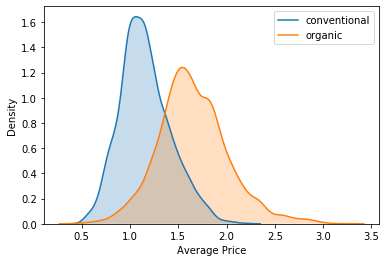

In [9]:
sns.kdeplot(conventional_df['AveragePrice'],shade=True,label='conventional')
sns.kdeplot(organic_df['AveragePrice'],shade=True,label='organic')
plt.xlabel("Average Price")
plt.ylabel("Density")
plt.show()

#### From the above chart we can easily see that for conventional avocados the density is high at cheaper price than orgnaic avocados

## Let's sort the data based on Date

In [10]:
avocado_data = avocado_data.sort_values('Date')
conventional_df = conventional_df.sort_values('Date')
organic_df = organic_df.sort_values('Date')
organic_df

,Date,AveragePrice,Total Volume,type,year,region
9489,2015-01-04,1.24,142349.77,organic,2015,California
10269,2015-01-04,1.50,6329.83,organic,2015,LasVegas
10893,2015-01-04,1.12,17296.85,organic,2015,PhoenixTucson
9437,2015-01-04,1.73,379.82,organic,2015,BuffaloRochester
11621,2015-01-04,1.30,5782.70,organic,2015,Spokane
...,...,...,...,...,...,...
17913,2018-03-25,1.48,7250.69,organic,2018,Nashville
17925,2018-03-25,1.36,8024.70,organic,2018,NewOrleansMobile
17625,2018-03-25,1.33,57606.42,organic,2018,BaltimoreWashington
17865,2018-03-25,1.74,91739.92,organic,2018,LosAngeles


### Comparision of Price

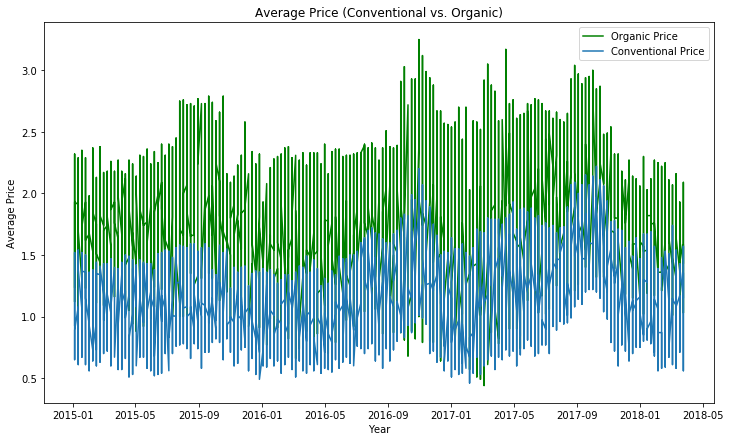

In [11]:
plt.figure(figsize=(12,7))

plt.plot(organic_df['Date'],organic_df['AveragePrice'], label="Organic Price", color='green')
plt.plot(conventional_df['Date'],conventional_df['AveragePrice'], label= "Conventional Price")
plt.title("Average Price (Conventional vs. Organic)")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.legend()
plt.show()

#### It is clearly shown from the chart that prices of avocados fluctuates in different times but organic avocados are always expensive than the other one

In [12]:
years = avocado_data['year'].unique()
years

array([2015, 2016, 2017, 2018])

In [13]:
organic_df.index = pd.DatetimeIndex(organic_df['Date'])
conventional_df.index = pd.DatetimeIndex(conventional_df['Date'])

conventional_df.head()

,Date,AveragePrice,Total Volume,type,year,region
Date,,,,,,
2015-01-04,2015-01-04,0.93,5777334.90,conventional,2015,California
2015-01-04,2015-01-04,1.10,407675.56,conventional,2015,Philadelphia
2015-01-04,2015-01-04,0.98,3204112.16,conventional,2015,Southeast
2015-01-04,2015-01-04,1.40,116253.44,conventional,2015,BuffaloRochester
2015-01-04,2015-01-04,0.80,317861.35,conventional,2015,LasVegas


### Yearly price Density

Text(0.5, 0.98, 'Conventional Type Avocado Average Price')

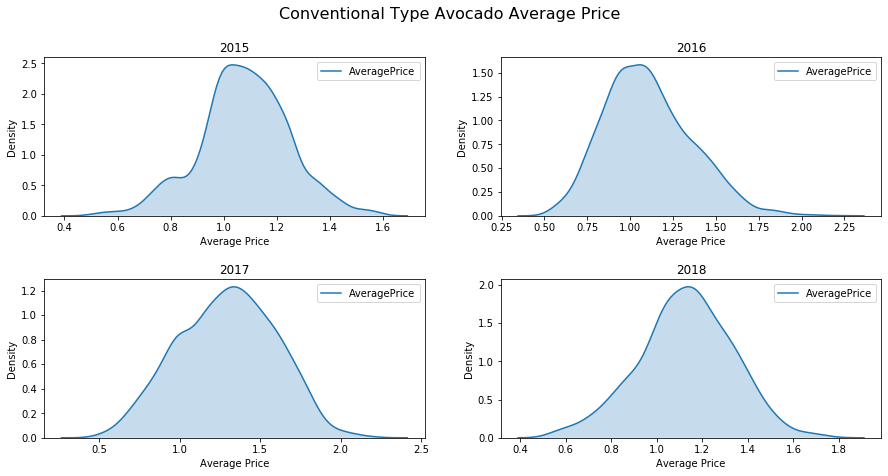

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,7))
y_index = 0
for row in range(2):
    for col in range(2):
        sns.kdeplot(conventional_df.loc[str(years[y_index])]['AveragePrice'],shade=True, ax=axes[row,col])
        plt.sca(axes[row,col])
        plt.title(f'{years[y_index]}')
        plt.ylabel("Density")
        plt.xlabel("Average Price")
        y_index += 1
        
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Conventional Type Avocado Average Price',fontsize=16,fontweight=100)

Text(0.5, 0.98, 'Orgnaic Avocado Average Price')

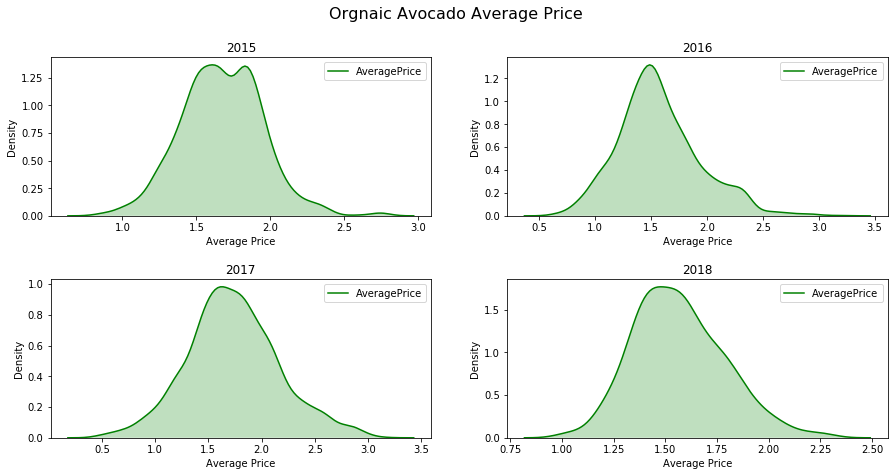

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,7))
y_index = 0
for row in range(2):
    for col in range(2):
        sns.kdeplot(organic_df.loc[str(years[y_index])]['AveragePrice'],shade=True, ax=axes[row,col], color='green')
        plt.sca(axes[row,col])
        plt.title(f'{years[y_index]}')
        plt.ylabel("Density")
        plt.xlabel("Average Price")
        y_index += 1
        
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Orgnaic Avocado Average Price',fontsize=16,fontweight=100)

## Seasonal Price Fluctuaions

In [16]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']

Text(0.5, 0.98, 'Conventional Avocado Seasonal Price Fluctuations')

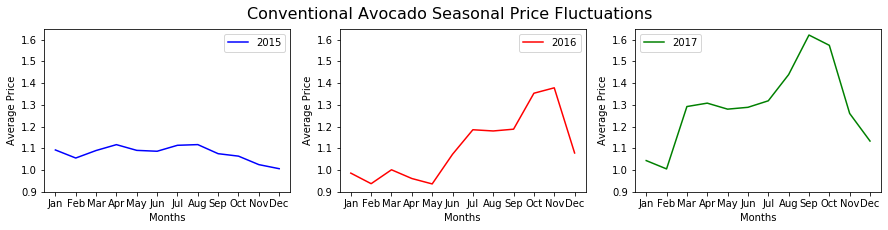

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
colors = ['blue','red','green']
for col,year in enumerate(years[:-1]):
    axes[col].plot(months,conventional_df.loc[str(year)].resample('M').agg(['mean'])['AveragePrice']['mean'], label=str(year),color=colors[col])
    plt.sca(axes[col])
    plt.ylim(0.9,1.65)
    plt.xlabel("Months")
    plt.ylabel("Average Price")
    plt.legend()
fig.suptitle('Conventional Avocado Seasonal Price Fluctuations',fontsize=16,fontweight=100)


Text(0.5, 0.98, 'Organic Avocado Seasonal Price Fluctuations')

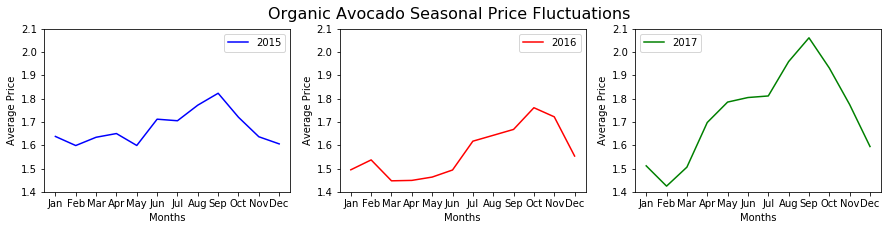

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
colors = ['blue','red','green']
for col,year in enumerate(years[:-1]):
    axes[col].plot(months,organic_df.loc[str(year)].resample('M').agg(['mean'])['AveragePrice']['mean'], label=str(year), color=colors[col])
    plt.sca(axes[col])
    plt.ylim(1.4,2.1)
    plt.xlabel("Months")
    plt.ylabel("Average Price")
    plt.legend()
fig.suptitle('Organic Avocado Seasonal Price Fluctuations',fontsize=16,fontweight=100)


## Total Volume Per Year comparison

In [19]:
conv_vol_year_df = conventional_df.groupby(['year']).sum()['Total Volume']
# conv_vol_year_df = conventional_df.resample('Y').agg(['sum'])['Total Volume']
conv_vol_year_df

year
2015    4.296599e+09
2016    4.690250e+09
2017    4.766166e+09
2018    1.334206e+09
Name: Total Volume, dtype: float64

In [20]:
# org_vol_year_df = organic_df.groupby(['year']).sum()['Total Volume']
org_vol_year_df = organic_df.resample('Y').agg(['sum'])['Total Volume']
org_vol_year_df

,sum
Date,
2015-12-31,8.886943e+07
2016-12-31,1.306401e+08
2017-12-31,1.681399e+08
2018-12-31,4.853227e+07


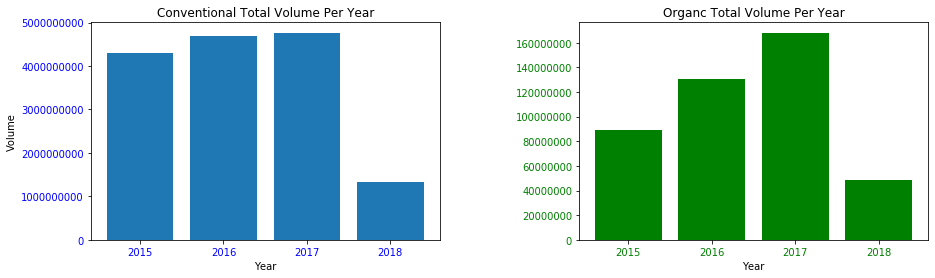

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
axes[0].bar(years,conv_vol_year_df.values.ravel())
axes[0].ticklabel_format(useOffset=False,style='plain')
axes[0].set_title('Conventional Total Volume Per Year')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Volume")
plt.sca(axes[0])
plt.xticks(range(min(years),max(years)+1), color='blue')
plt.yticks(color='blue')


axes[1].bar(years,org_vol_year_df.values.ravel(),color='green')
axes[1].ticklabel_format(useOffset=False,style='plain')
axes[1].set_title('Organc Total Volume Per Year')
axes[1].set_xlabel("Year")
# axes[1].set_ylabel("Volume")
plt.sca(axes[1])
plt.xticks(range(min(years),max(years)+1), color='green')
plt.yticks(color='green')

fig.subplots_adjust(wspace=0.4)

#### From the above charts we can see that there is a huge difference between both the avocado volumes

### To see the region names

In [22]:
avocado_data['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

# 4. Data Preprocessing

## Convert the data into the format that Fbprophet accepts

In [23]:
conv_data_prophet = conventional_df[['Date','AveragePrice']]
conv_data_prophet = conv_data_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
conv_data_prophet.head()

,ds,y
Date,,
2015-01-04,2015-01-04,0.93
2015-01-04,2015-01-04,1.10
2015-01-04,2015-01-04,0.98
2015-01-04,2015-01-04,1.40
2015-01-04,2015-01-04,0.80


In [24]:
org_data_prophet = organic_df[['Date','AveragePrice']]
org_data_prophet = org_data_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
org_data_prophet.head()

,ds,y
Date,,
2015-01-04,2015-01-04,1.24
2015-01-04,2015-01-04,1.50
2015-01-04,2015-01-04,1.12
2015-01-04,2015-01-04,1.73
2015-01-04,2015-01-04,1.30


# 5. Model Prediction

## Conventional Avocado Price Prediction

In [25]:
conv_model = Prophet()
conv_model.fit(conv_data_prophet)
conv_future = conv_model.make_future_dataframe(periods=365)
conv_forecast = conv_model.predict(conv_future)
conv_forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.208613,0.824792,1.389793,1.208613,1.208613,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,0.0,0.0,0.0,1.105391
1,2015-01-04,1.208613,0.814665,1.378636,1.208613,1.208613,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,0.0,0.0,0.0,1.105391
2,2015-01-04,1.208613,0.831622,1.370335,1.208613,1.208613,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,0.0,0.0,0.0,1.105391
3,2015-01-04,1.208613,0.841001,1.372264,1.208613,1.208613,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,0.0,0.0,0.0,1.105391
4,2015-01-04,1.208613,0.834910,1.370193,1.208613,1.208613,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,-0.103222,0.0,0.0,0.0,1.105391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9486,2019-03-21,0.881204,0.429545,1.240702,0.619664,1.156987,-0.045038,-0.045038,-0.045038,-0.045038,-0.045038,-0.045038,0.0,0.0,0.0,0.836166
9487,2019-03-22,0.880364,0.457515,1.224716,0.617437,1.157676,-0.043780,-0.043780,-0.043780,-0.043780,-0.043780,-0.043780,0.0,0.0,0.0,0.836584
9488,2019-03-23,0.879524,0.435823,1.234975,0.615209,1.158366,-0.042116,-0.042116,-0.042116,-0.042116,-0.042116,-0.042116,0.0,0.0,0.0,0.837409
9489,2019-03-24,0.878684,0.454386,1.203167,0.613050,1.159010,-0.040070,-0.040070,-0.040070,-0.040070,-0.040070,-0.040070,0.0,0.0,0.0,0.838614


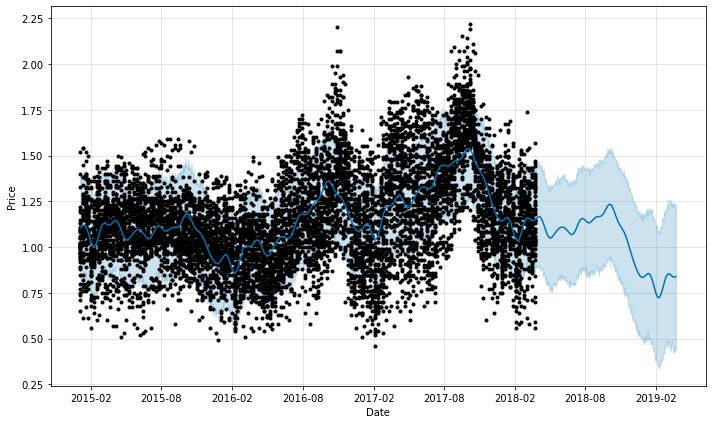

In [26]:
conv_figure = conv_model.plot(conv_forecast, xlabel="Date", ylabel="Price")

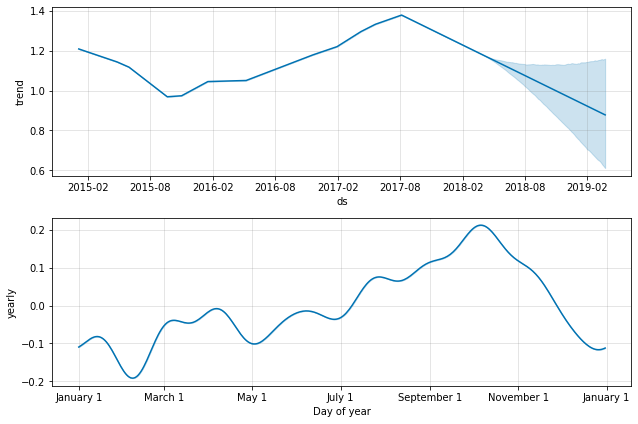

In [27]:
conv_figure = conv_model.plot_components(conv_forecast)

## Organic Avocado Price Prediction

In [28]:
org_model = Prophet()
org_model.fit(org_data_prophet)
org_future = org_model.make_future_dataframe(periods=365)
org_forecast = org_model.predict(org_future)
org_forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.752313,1.172944,2.082847,1.752313,1.752313,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,0.0,0.0,0.0,1.637643
1,2015-01-04,1.752313,1.207578,2.077567,1.752313,1.752313,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,0.0,0.0,0.0,1.637643
2,2015-01-04,1.752313,1.205413,2.052488,1.752313,1.752313,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,0.0,0.0,0.0,1.637643
3,2015-01-04,1.752313,1.229124,2.043598,1.752313,1.752313,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,0.0,0.0,0.0,1.637643
4,2015-01-04,1.752313,1.195085,2.042886,1.752313,1.752313,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,0.0,0.0,0.0,1.637643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9483,2019-03-21,1.420489,0.807904,1.787079,1.284081,1.580830,-0.123960,-0.123960,-0.123960,-0.123960,-0.123960,-0.123960,0.0,0.0,0.0,1.296529
9484,2019-03-22,1.419826,0.877622,1.766922,1.282780,1.580567,-0.122091,-0.122091,-0.122091,-0.122091,-0.122091,-0.122091,0.0,0.0,0.0,1.297736
9485,2019-03-23,1.419164,0.855408,1.754659,1.281480,1.580260,-0.120095,-0.120095,-0.120095,-0.120095,-0.120095,-0.120095,0.0,0.0,0.0,1.299069
9486,2019-03-24,1.418501,0.828955,1.772178,1.280179,1.579954,-0.117987,-0.117987,-0.117987,-0.117987,-0.117987,-0.117987,0.0,0.0,0.0,1.300514


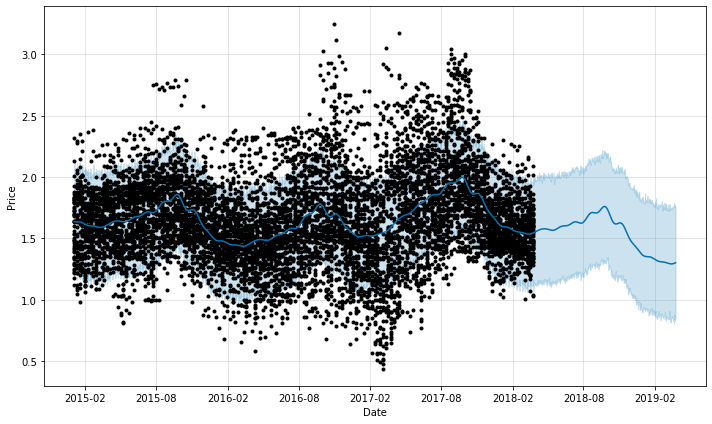

In [29]:
org_fig = org_model.plot(org_forecast, xlabel="Date", ylabel="Price")

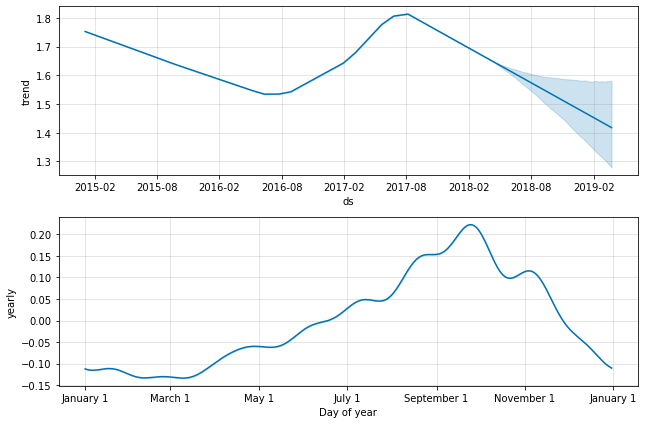

In [30]:
org_fig = org_model.plot_components(org_forecast)

## LasVegas Conventional Avocado Price Prediction

In [31]:
LasVegas_conv_data = conventional_df[conventional_df['region']=='LasVegas']
LasVegas_conv_data_prophet = LasVegas_conv_data[['Date','AveragePrice']] 
LasVegas_conv_data_prophet = LasVegas_conv_data_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
model_conv_LasVegas = Prophet()
model_conv_LasVegas.fit(LasVegas_conv_data_prophet)
future_LasVegas_conv = model_conv_LasVegas.make_future_dataframe(periods=365)
forecast_LasVegas_conv = model_conv_LasVegas.predict(future_LasVegas_conv)
forecast_LasVegas_conv[['ds','trend']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend
0,2015-01-04,1.053664
1,2015-01-11,1.050262
2,2015-01-18,1.046860
3,2015-01-25,1.043457
4,2015-02-01,1.040055
...,...,...
529,2019-03-21,1.394931
530,2019-03-22,1.395413
531,2019-03-23,1.395895
532,2019-03-24,1.396377


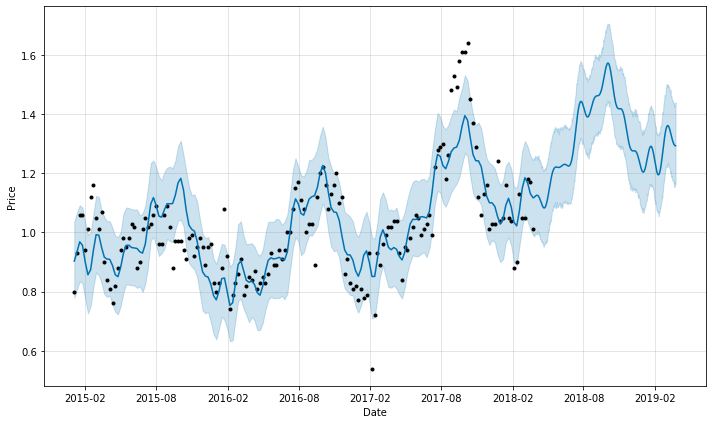

In [32]:
figure_LasVegas_conv = model_conv_LasVegas.plot(forecast_LasVegas_conv, xlabel="Date", ylabel="Price")

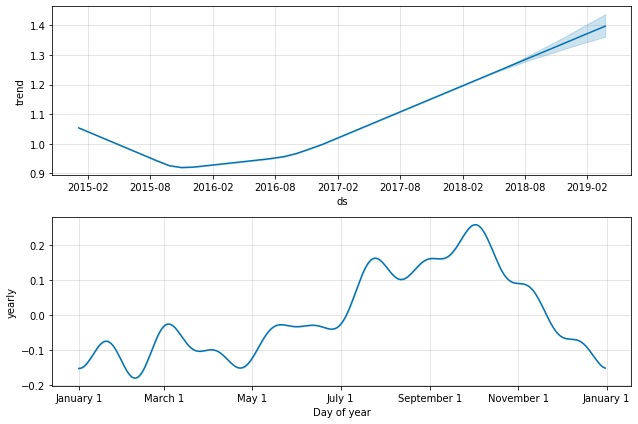

In [33]:
figure_LasVegas_conv = model_conv_LasVegas.plot_components(forecast_LasVegas_conv)

## Orgnaic Avocado LasVegas Price Prediction

In [34]:
LasVegas_org_data = organic_df[organic_df['region']=='LasVegas']
LasVegas_org_data_prophet = LasVegas_org_data[['Date','AveragePrice']] 
LasVegas_org_data_prophet = LasVegas_org_data_prophet.rename(columns={'Date':'ds','AveragePrice':'y'})
model_org_LasVegas = Prophet()
model_org_LasVegas.fit(LasVegas_org_data_prophet)
future_LasVegas_org = model_org_LasVegas.make_future_dataframe(periods=365)
forecast_LasVegas_org = model_org_LasVegas.predict(future_LasVegas_org)
forecast_LasVegas_org[['ds','trend']]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend
0,2015-01-04,1.751540
1,2015-01-11,1.751450
2,2015-01-18,1.751360
3,2015-01-25,1.751269
4,2015-02-01,1.751179
...,...,...
529,2019-03-21,1.919059
530,2019-03-22,1.919264
531,2019-03-23,1.919469
532,2019-03-24,1.919674


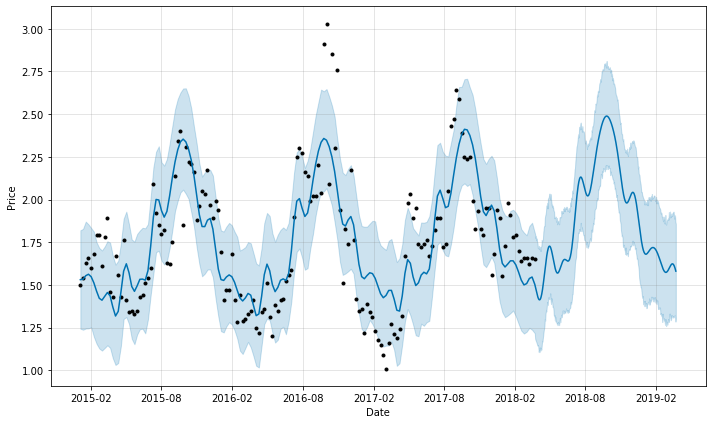

In [35]:
figure_LasVegas_org = model_org_LasVegas.plot(forecast_LasVegas_org, xlabel="Date", ylabel="Price")

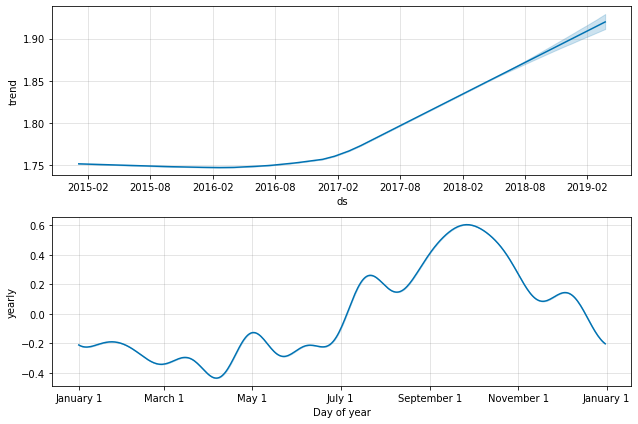

In [36]:
figure_LasVegas_org = model_org_LasVegas.plot_components(forecast_LasVegas_org)